# 1. Packages & Data

In [2]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,665 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

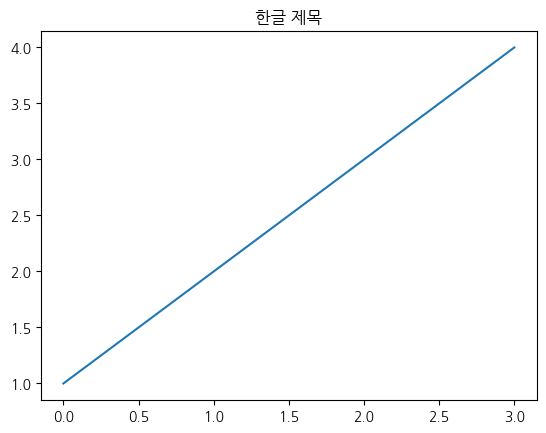

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/Machine Learning project/Data

/content/drive/MyDrive/Machine Learning project/Data


In [7]:
!ls

1.premium.csv		       2.LCDataDictionary.xlsx			4.Train.csv
2.accepted_2007_to_2018Q4.csv  3.WA_Fn-UseC_-HR-Employee-Attrition.csv


In [8]:
!pip install squarify

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('5.Market_Basket_Optimisation.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 데이터 모형
data.shape

(7501, 20)

In [14]:
# 랜덤 샘플 데이터 보기
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5432,turkey,frozen vegetables,mineral water,chicken,eggs,antioxydant juice,chocolate,fresh bread,white wine,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3116,red wine,avocado,almonds,carrots,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,energy bar,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,turkey,chocolate,whole wheat rice,oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7278,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 컬럼별 데이터 타입 알아보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [16]:
# 컬럼별 간단한 통계값 보기
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


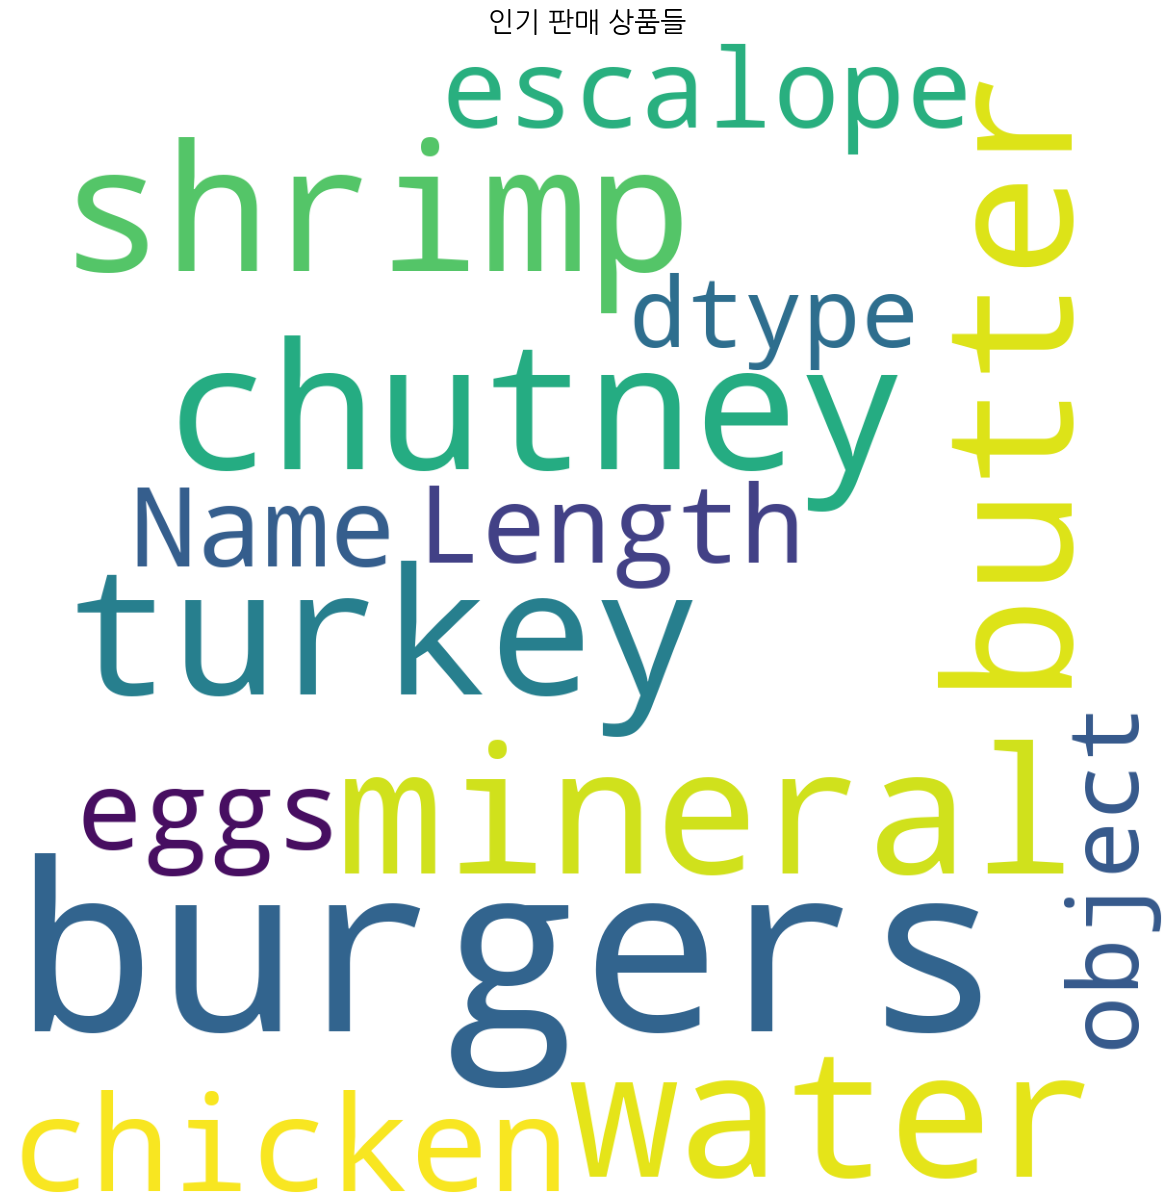

In [17]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('인기 판매 상품들',fontsize = 20)
plt.show()

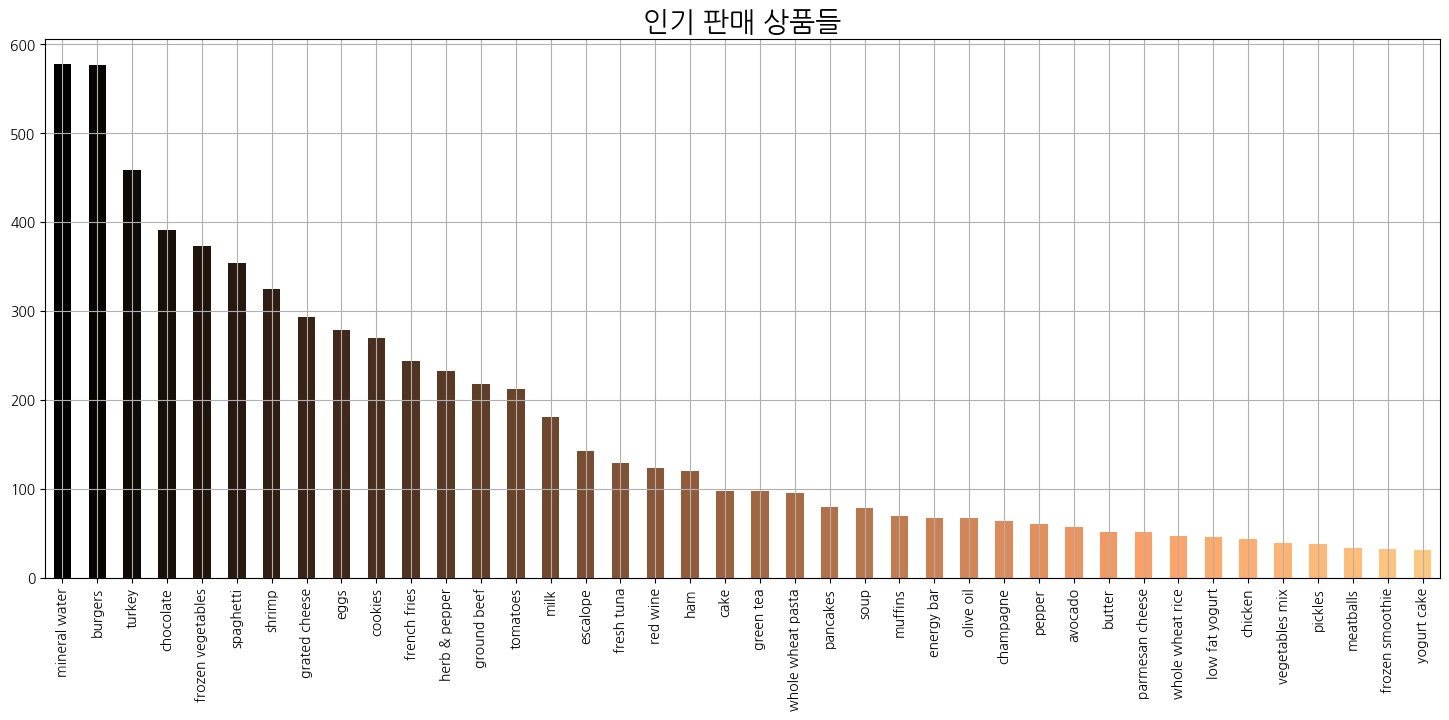

In [18]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('인기 판매 상품들', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [19]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object')

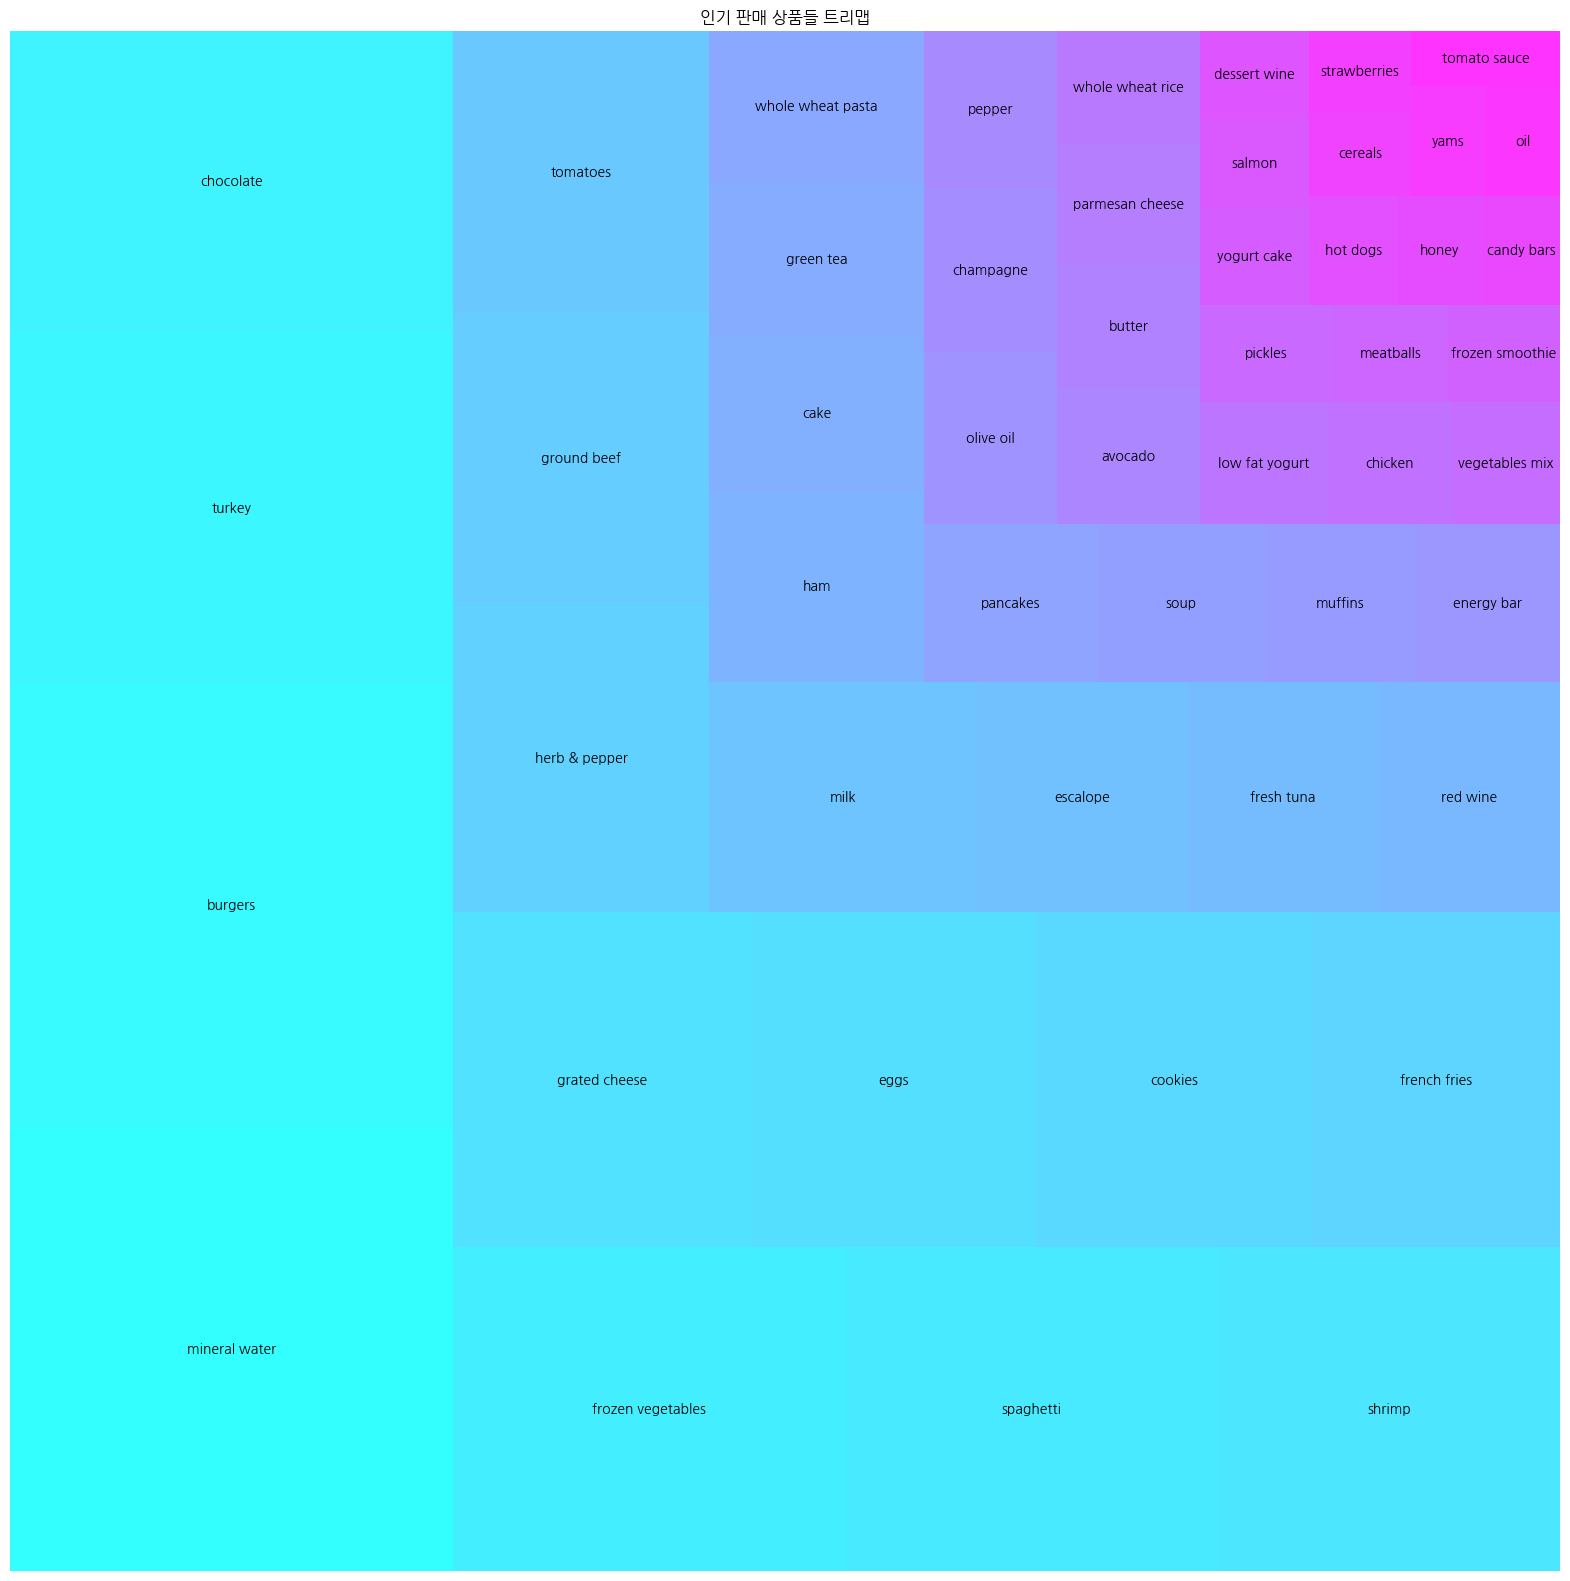

In [20]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('인기 판매 상품들 트리맵')
plt.axis('off')
plt.show()

In [21]:
# 동일한 크기의 리스트에 각 손님들의 쇼핑 목록을 넣기
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# numpy array 로 변환
trans = np.array(trans)
print(trans.shape)

(7501, 20)


In [22]:
trans[0]

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'], dtype='<U20')

In [23]:
# Transaction Encoder
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(7501, 121)

In [24]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
len(y.index)

50

In [26]:
data = data[y.index]

# 연관 규칙 분석 절차

1. 모든 거래에서 발생하는 모든 항목에 대한 빈도 테이블 생성
2. Support가 임의의 값 보다 큰 것들로 필터링
3. 중요 항목의 모든 가능한 조합을 만들기
4. 모든 조합의 발생 횟수 계산
5. Associaition Rules 적용
6. 해석



# 연관 규칙 분석
1. 지지도 (Support)
지지도는 전체 거래 중 특정 항목(또는 항목 집합)이 얼마나 자주 발생하는지를 나타내는 지표입니다. 즉, 항목의 인기도를 나타냅니다. 계산 방법은 다음과 같습니다 :
Support(A) = 거래에서 A가 나타난 횟수 전체 거래 수 Support(A) = 전체 거래 수 거래에서 A가 나타난 횟수
2. 신뢰도 (Confidense)
신뢰도는 한 항목이 나타났을 때, 다른 특정 항목이 동시에 나타날 확률입니다. 이는 "A가 주어졌을 때 B의 조건부 확률"과 같습니다. 계산 방법은 다음과 같습니다.
Confidence(A->B) = A와 B를 동시에 포함하는 거래 수 A를 포함하는 거래 수 Confidence(A->B)= A 포함하는 거래수 A와 B를 동시에 포함하는 거래수
3. 향상도 (Lift)
향상도는 A와 B의 동시 발생이 우연인지 아니면 실제 연관성이 있는지를 나타냅니다. 향상도가 1보다 크면 A와 B가 함께 나타날 가능성이 높고, 1이면 독립적인 관계, 1보다 작으면 함께 나타날 가능성이 낮다는 것을 의미합니다. 계산 방법은 다음과 같습니다.
lift(C,A) = support(C->A) / (support[A] * support[C]) = confidence(C->A) / support(A)

### **예시 설명**

이제 주어진 예시를 바탕으로 향상도를 계산해보겠습니다.

- 거래1: (A, B, C)
- 거래2: (A, C)
- 거래3: (A, D)
- 거래4: (E, F, G)

여기서 lift(C,A)를 계산하려면 다음 단계를 따릅니다:

1. **Support(C→A) 계산**: C와 A가 동시에 나타난 거래는 거래1과 거래2입니다. 따라서, Support(C→A) = 2/4 = 0.5
2. **Support(A) 계산**: A가 나타난 거래는 거래1, 거래2, 거래3입니다. 따라서, Support(A) = 3/4 = 0.75
3. **Support(C) 계산**: C가 나타난 거래는 거래1과 거래2입니다. 따라서, Support(C) = 2/4 = 0.5
4. **향상도(Lift) 계산**: Lift(C,A) = Support(C→A) / (Support(A) * Support(C)) = 0.5 / (0.75 * 0.5) = 1.3333

이 값(1.3333)은 1보다 크므로, C가 주어졌을 때 A가 나타날 가능성이 독립적인 경우보다 높다는 것을 의미합니다.

# Apriori 알고리즘 적용

In [27]:
# 1. 모든 거래에서 발생하는 모든 항목에 대해 빈도 테이블을 생성
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,salmon,dessert wine,hot dogs,honey,candy bars,cereals,strawberries,yams,oil,tomato sauce
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# 2. support가 임의의 값보다 큰 것들로 필터링
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False).head()

,support,itemsets
0,0.238368,(mineral water)
8,0.179709,(eggs)
5,0.174110,(spaghetti)
10,0.170911,(french fries)
3,0.163845,(chocolate)


In [35]:
# 모든 조합의 발생 횟수 계산
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1


In [36]:
# 품목 3개, 지지도 0.01 이상인 데이터
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.01)].head()

,support,itemsets,length
206,0.015865,"(chocolate, mineral water, spaghetti)",3
207,0.013465,"(eggs, chocolate, mineral water)",3
208,0.010932,"(chocolate, mineral water, ground beef)",3
209,0.013998,"(chocolate, mineral water, milk)",3
210,0.011998,"(frozen vegetables, mineral water, spaghetti)",3


In [41]:
# 품목 2개, 지지도 0.01 이상인 데이터
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ].head()

,support,itemsets,length
47,0.024397,"(burgers, mineral water)",2
48,0.019197,"(turkey, mineral water)",2
49,0.052660,"(chocolate, mineral water)",2
50,0.035729,"(frozen vegetables, mineral water)",2
51,0.059725,"(mineral water, spaghetti)",2


In [40]:
# 품목 2개, 지지도 0.01 이상인 데이터
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.1) ].head()

,support,itemsets,length
0,0.238368,(mineral water),1
3,0.163845,(chocolate),1
5,0.174110,(spaghetti),1
8,0.179709,(eggs),1
10,0.170911,(french fries),1


In [42]:
# Associaition Rules 적용
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.1)
df_ar.sort_values("confidence", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
297,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
306,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
259,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837
271,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555
30,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


### 해석 컬럼

1. **antecedents (전조)**: 규칙의 첫 번째 부분으로, 특정 아이템(들)이 구매되었을 때를 나타냅니다.
2. **consequents (후행)**: 규칙의 두 번째 부분으로, 전조에 따라 구매가 예측되는 아이템(들)입니다.
3. **antecedent support**: 전조에 해당하는 아이템(들)이 데이터에서 차지하는 비율입니다.
4. **consequent support**: 후행에 해당하는 아이템(들)이 데이터에서 차지하는 비율입니다.
5. **support**: 전체 거래 중 전조와 후행 아이템(들)이 함께 발생하는 비율입니다.
6. **confidence**: 전조 아이템(들)이 있을 때 후행 아이템(들)도 함께 있는 비율입니다.
7. **lift**: 전조와 후행 아이템(들)의 연관성이 우연인지 아닌지를 나타내는 지표로, 1보다 크면 우연이 아니라는 것을 의미합니다.
8. **leverage**: 전조와 후행이 동시에 발생하는 정도가 얼마나 높은지를 나타내는 지표로, 0에서 멀어질수록 강한 연관성을 나타냅니다.
9. **conviction**: 후행 아이템(들)이 전조 아이템(들) 없이 발생할 가능성이 얼마나 낮은지 나타내는 지표로, 높을수록 강한 연관성을 나타냅니다.
10. **zhangs_metric**: 규칙의 방향성을 나타내는 지표로, 값이 1에 가까울수록 전조가 후행을 강하게 임플리케이션한다는 것을 의미합니다.